In [19]:
# task get all chms 
# mosaic together
# 
# get chm path 
# 
import glob
chms = glob.glob('/gpfs/data1/vclgp/data/gedi/imported/africa/csir_limpopo/chm/*.tif')

In [49]:
len(chms)

351

In [74]:
import rasterio
for c in chms:
        dataset = rasterio.open(c)
        # dataset.meta
        # dataset.res # 1m 
        # dataset.transform * (0, 0) # upper left corner
        # dataset.indexes
        band1 = dataset.read(1)
        print(band1.shape)

(506, 982)
(159, 291)
(507, 1007)
(507, 1007)
(834, 1012)
(1001, 746)
(507, 1007)
(507, 1007)
(368, 1003)
(823, 1012)
(392, 761)
(1014, 1014)
(157, 14)
(505, 1007)
(507, 1007)
(507, 1007)
(670, 1009)
(507, 1007)
(507, 1007)
(670, 1009)
(507, 1008)
(835, 1011)
(671, 1010)
(67, 48)
(819, 1012)
(835, 1010)
(1006, 472)
(507, 1007)
(608, 181)
(507, 1007)
(589, 1006)
(507, 1007)
(507, 1007)
(507, 828)
(507, 1008)
(505, 666)
(671, 1010)
(671, 1010)
(835, 1011)
(507, 945)
(835, 1012)
(507, 1007)
(835, 1011)
(834, 1012)
(506, 1007)
(386, 426)
(834, 995)
(706, 1010)
(255, 527)
(507, 1007)
(835, 1011)
(835, 1011)
(507, 1007)
(507, 1007)
(1014, 1014)
(827, 1012)
(835, 1010)
(929, 1007)
(823, 1011)
(507, 1007)
(316, 1004)
(507, 1007)
(507, 1007)
(241, 1003)
(640, 1008)
(233, 1003)
(507, 1007)
(819, 1012)
(507, 1007)
(671, 1009)
(507, 1007)
(374, 321)
(671, 1010)
(212, 841)
(671, 1010)
(507, 1007)
(489, 1005)
(671, 1010)
(507, 1008)
(281, 1004)
(831, 538)
(507, 500)
(819, 1012)
(509, 1001)
(507, 100

In [75]:
dataset.bounds

BoundingBox(left=231208.0, bottom=7438247.0, right=232215.0, top=7438754.0)

In [78]:
dataset.meta['crs']

CRS.from_epsg(32736)

(1,)

(831, 538)

In [71]:
x, y = (dataset.bounds.left + 100, dataset.bounds.top - 100)
row, col = dataset.index(x, y)
band1[row, col]

0.0

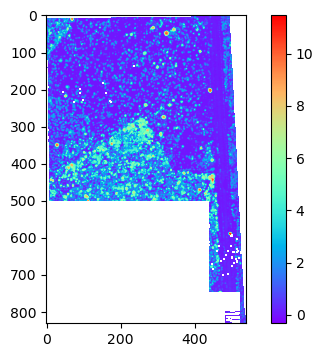

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))  # Adjust the width and height as desired
plt.imshow(band1, cmap='rainbow')
cbar = plt.colorbar(fraction=0.025, pad=0.04)
plt.show()  

In [81]:
# get my ease grids
# https://nsidc.org/data/user-resources/help-center/guide-ease-grids#anchor-9
# epsg 6933
xmin=-17367530.44
ymax=7314540.83
bin=1000.90
cols=34704
rows=14616

In [82]:
# what the is mim region to consider ?
# 10 square km --> 10mb
# 80 square km --> 76mb

34704

In [269]:
34704/72, 14616/72

(482.0, 203.0)

In [270]:
# give a cell index, return bounds in lat,lon
# index start from 0
def get_cell_bounds(col, row):
    bin_size = 1000.90*72 # 72km
    cell_x_min = -17367530.44 + bin_size*col
    cell_y_max = 7314540.83 - bin_size*row
    cell_x_max = cell_x_min + bin_size 
    cell_y_min = cell_y_max - bin_size 
    return cell_x_min, cell_y_min, cell_x_max, cell_y_max

In [272]:
get_cell_bounds(300, 100)

(4251909.559999999, 35996.03000000007, 4323974.3599999985, 108060.83000000007)

In [286]:
# give a cell, return list of chms and merge. 
c, r 

(30, 4)

In [98]:
# read site gdf to get site name 
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

In [285]:
als_plots = gpd.read_parquet('../data/all_sites_20231218.parquet')
gdf_6933 = als_plots.to_crs(epsg=6933)
from shapely.geometry import Point, box
#from pyproj import Transformer
#transformer = Transformer.from_crs(6933, 4326,   always_xy=True)
for c in range(482):
    for r in range(203):
        cell = get_cell_bounds(c, r)
        idx = gdf_6933.sindex.query(box(cell[0], cell[1], cell[2], cell[3])) # fast spatial index.
        #lon_min, lat_min = transformer.transform(cell[0], cell[1])
        #lon_max, lat_max = transformer.transform(cell[2], cell[3])
        #  bounding box of each input geometry intersects the bounding box of a tree geometry
        #idx = als_plots.sindex.query(box(lon_min, lat_min, lon_max, lat_max)) # box(minx, miny, maxx, maxy, ccw=True)
        # edge case, > 1 als plot in this cell.
        flag = 0
        if len(idx) > 0 : 
            #res1 = gdf_6933.loc[idx]
            #idx1 = res1.intersects(box(cell[0], cell[1], cell[2], cell[3])) # detail intersection, not only bounds
            #if any(idx1):
                flag = 1
                print(gdf_6933.loc[idx])
                break
        # return Integer indices 
    if flag == 1 : 
            break

    region           name       area_ha   epsg  \
210    usa  neon_barr2019  198838.96203  32604   

                                              geometry  
210  MULTIPOLYGON (((-15123182.485 6949645.623, -15...  


In [289]:
cell = get_cell_bounds(31, 5)
cell

(-15133521.64, 6882152.03, -15061456.84, 6954216.83)

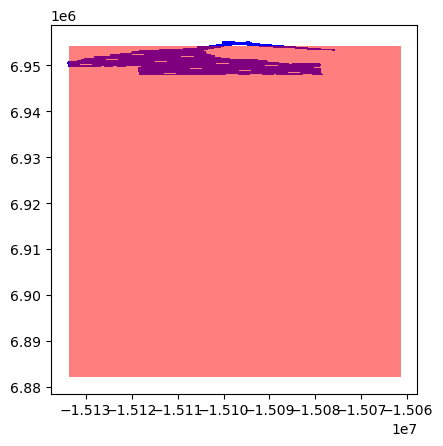

In [290]:
cb = box(cell[0], cell[1], cell[2], cell[3])
cb_gdf = gpd.GeoDataFrame(geometry=[cb], crs="EPSG:6933")
# Plot gdf1
ax = res1.plot(color='blue')
# Plot gdf2 on the same axis
cb_gdf.plot(ax=ax, color='red', alpha = 0.5)
# Show the plot
plt.show()

In [281]:
print(cb)

POLYGON ((-15061456.84 6882152.03, -15061456.84 6954216.83, -15133521.64 6954216.83, -15133521.64 6882152.03, -15061456.84 6882152.03))


In [260]:
reg = als_plots.loc[idx[0]]['region']
name =  als_plots.loc[idx[0]]['name']
epsg = als_plots.loc[idx[0]]['epsg']

In [489]:
# locate the chm folder 
chms_path = '/gpfs/data1/vclgp/data/gedi/imported/' + reg + '/' + name + '/chm/*.tif'
chms = glob.glob(chms_path)
len(chms)

415

In [291]:
# find chm in 10km cell
transformer = Transformer.from_crs(6933, epsg,   always_xy=True)
t_xmin, t_ymin = transformer.transform(cell[0], cell[1])
t_xmax, t_ymax = transformer.transform(cell[2], cell[3])
cell_box = box(t_xmin, t_ymin, t_xmax, t_ymax) # box(minx, miny, maxx, maxy, ccw=True)
#############
# transformer = Transformer.from_crs(4326, 32604,   always_xy=True)
# t_xmin, t_ymin = transformer.transform(lon_min, lat_min)
# t_xmax, t_ymax = transformer.transform(lon_max, lat_max)
# cell_box = box(t_xmin, t_ymin, t_xmax, t_ymax) # box(minx, miny, maxx, maxy, ccw=True)


chms_in_cell = []
for c in chms:
    dataset = rasterio.open(c)
    chm_box  = box(dataset.bounds.left,dataset.bounds.bottom, dataset.bounds.right, dataset.bounds.top)
    if chm_box.intersects(cell_box): chms_in_cell.append(c)
chms_in_cell

['/gpfs/data1/vclgp/data/gedi/imported/usa/neon_barr2019/chm/NEON_D18_BARR_DP1_596000_7905000_classified_point_cloud_colorized_chm.tif',
 '/gpfs/data1/vclgp/data/gedi/imported/usa/neon_barr2019/chm/NEON_D18_BARR_DP1_584000_7907000_classified_point_cloud_colorized_chm.tif',
 '/gpfs/data1/vclgp/data/gedi/imported/usa/neon_barr2019/chm/NEON_D18_BARR_DP1_583000_7915000_classified_point_cloud_colorized_chm.tif',
 '/gpfs/data1/vclgp/data/gedi/imported/usa/neon_barr2019/chm/NEON_D18_BARR_DP1_591000_7905000_classified_point_cloud_colorized_chm.tif',
 '/gpfs/data1/vclgp/data/gedi/imported/usa/neon_barr2019/chm/NEON_D18_BARR_DP1_587000_7905000_classified_point_cloud_colorized_chm.tif',
 '/gpfs/data1/vclgp/data/gedi/imported/usa/neon_barr2019/chm/NEON_D18_BARR_DP1_584000_7906000_classified_point_cloud_colorized_chm.tif',
 '/gpfs/data1/vclgp/data/gedi/imported/usa/neon_barr2019/chm/NEON_D18_BARR_DP1_594000_7908000_classified_point_cloud_colorized_chm.tif',
 '/gpfs/data1/vclgp/data/gedi/imported/us

In [293]:
with open('tiff_list.txt', 'w') as f:
    for file_name in chms_in_cell:
        f.write(file_name + '\n')

In [314]:
import subprocess
# Command to run
command = "gdal_merge.py -ps 1000 1000  -o /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/usa_neon_barr2019.tif --optfile tiff_list.txt "  # Example command (listing files in current directory)

#command = f"gdal_merge.py -ps 1000 1000  -o /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/usa_neon_barr2019.tif {chms_in_cell} "  # Example command (listing files in current directory)

# Run the command
output = subprocess.run(command, shell=True, capture_output=True, text=True)

In [315]:
# gdalwarp -t_srs EPSG:4326 input.tif output.tif

CompletedProcess(args='gdal_merge.py -ps 1000 1000  -o /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/usa_neon_barr2019.tif --optfile tiff_list.txt ', returncode=0, stdout='0...10...20...30...40...50...60...70...80...90...100 - done.\n', stderr='')

In [263]:
# Create a GeoDataFrame with a single row containing the bounding box geometry
bbox_gdf = gpd.GeoDataFrame(geometry=[cell_box], crs="EPSG:32604")
#bbox_gdf = gpd.GeoDataFrame(geometry=[box(lon_min, lat_min, lon_max, lat_max)], crs="EPSG:4326")
# Save the GeoDataFrame to a GeoPackage file
bbox_gdf.to_file("../tmp_test/cell_utm.gpkg", driver="GPKG")
res1.to_file("../tmp_test/res1.gpkg", driver="GPKG")

In [180]:
bbox_gdf

,geometry
0,"POLYGON ((576007.280 7919660.816, 576007.280 7..."


In [328]:
dataset = rasterio.open('../result/chm/drc_ghent_field_32734.tif')

In [329]:
dataset.meta['crs']

In [299]:
dataset.bounds

BoundingBox(left=583000.0, bottom=7903149.0, right=598243.0, top=7921000.0)

In [330]:
# locate the chm folder 
reg = 'africa'
name = 'drc_ghent_field_32734'
chms_path = '/gpfs/data1/vclgp/data/gedi/imported/' + reg + '/' + name + '/chm/*.tif'
chms = glob.glob(chms_path)
len(chms)

415

In [333]:
# plot gridided height 
chms =glob.glob( '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/*_wgs84.tif')

In [468]:
import time
def plot_tif(c):
    #print(c)
    dataset = rasterio.open(c)
    band1 = dataset.read(1)
    data = band1[~np.isnan(band1)]
    data = data[data != -999999]
    if len(data) < 1: 
        print('No data in this file', c)
        return
    p5 = np.percentile(data, 5)
    p95 = np.percentile(data, 95)
    if p5 < -10 or p95 > 120:
        print(f'file {c}, p5 {p5} , p95 {p95}')
        plt.figure(figsize=(8, 4))  # Adjust the width and height as desired
        plt.imshow(band1, cmap='rainbow' , vmin = 0, vmax = 120)
        cbar = plt.colorbar(fraction=0.025, pad=0.04)
        plt.savefig('../report/'+os.path.basename(c)[:-10]+'.png')
        plt.show()

In [435]:
# cal/val paper
VALID_SITES = ['amani','csir_agincourt', 'csir_dnyala', 'csir_ireagh', 'csir_justicia', 'csir_venetia', 'csir_welverdient', 'drc_ghent_field_32635', 
               'drc_ghent_field_32733', 'drc_ghent_field_32734', 'gsfc_mozambique', 'jpl_lope', 'jpl_rabi', 'khaoyai_thailand', 
               'chowilla', 'credo', 'karawatha', 'litchfield', 'rushworth_forests', 'tern_alice_mulga', 'tern_robson_whole', 'costarica_laselva2019', 
               'skidmore_bayerischer', 'zofin_180607', 'spain_exts1', 'spain_exts2', 'spain_exts3', 'spain_leonposada', 'spain_leon1', 
               'spain_leon2', 'spain_leon3', 'jpl_borneo_004', 'jpl_borneo_013', 'jpl_borneo_040', 'jpl_borneo_119', 'jpl_borneo_144', 'chave_paracou', 
               'embrapa_brazil_2020_and_a01', 'embrapa_brazil_2020_bon_a01', 'embrapa_brazil_2020_cau_a01', 'embrapa_brazil_2020_duc_a01', 
               'embrapa_brazil_2020_hum_a01', 'embrapa_brazil_2020_par_a01', 'embrapa_brazil_2020_rib_a01', 'embrapa_brazil_2020_tal_a01',
               'embrapa_brazil_2020_tan_a01', 'embrapa_brazil_2020_tap_a01', 'embrapa_brazil_2020_tap_a04', 'walkerfire_20191007', 
               'neon_abby','neon_bart2018','neon_blan2019','neon_clbj2019','neon_dsny2018',
               'neon_harv2018','neon_jerc2019','neon_leno2018','neon_mlbs2018','neon_osbs2018',
               'neon_puum2019','neon_scbi2019','neon_steicheq2019','neon_yell2019' 'inpe_brazil31983', 'inpe_brazil31981', 
               'inpe_brazil31979', 'inpe_brazil31976', 'inpe_brazil31975', 'inpe_brazil31973', 'inpe_brazil31974', 'inpe_brazil31978',
               'cambridge_sepilok', 'g_aguilarNP', 'nsw_armidale', 'nsw_casino', 'nsw_coffsharbour',
               'southafrica_karkloof', 'southafrica_umgano']

In [450]:
 plot_tif(chms[100])

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/slatecreek_2008_wgs84.tif, p5 0.0 , p95 1735.3009765624993


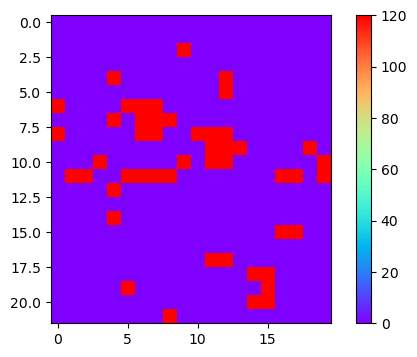

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/jpl_borneo_138_wgs84.tif, p5 81.0159984588623 , p95 670.1830200195312


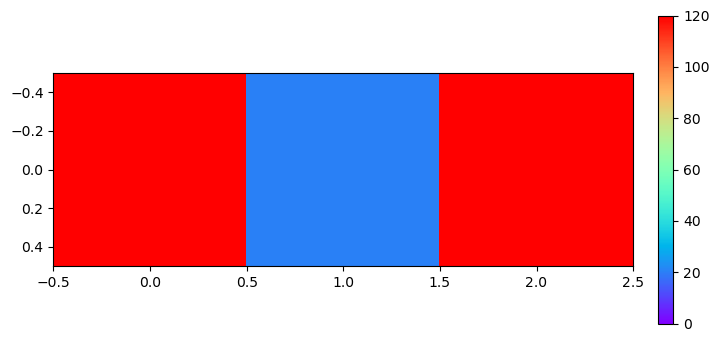

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2014_can_wgs84.tif, p5 0.0 , p95 925.9354949951172


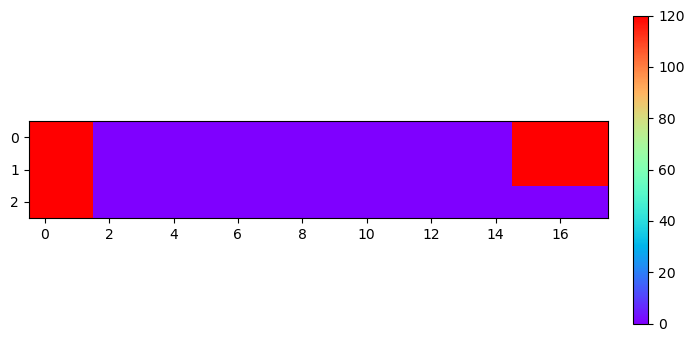

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/usda_mn_wgs84.tif, p5 0.0 , p95 418.479000854492


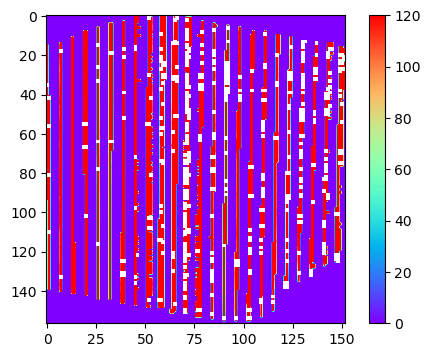

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/neon_blan2022_wgs84.tif, p5 0.0 , p95 308.8245025634765


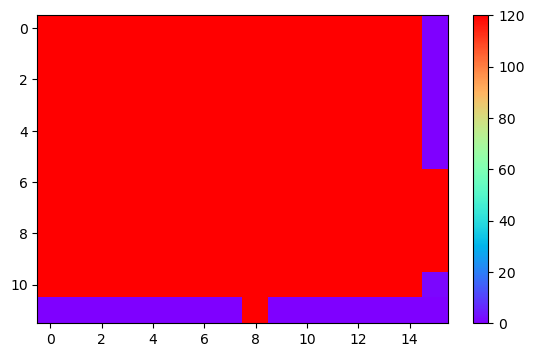

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/germany_coburn1_wgs84.tif, p5 688.0543579101562 , p95 847.2540283203125


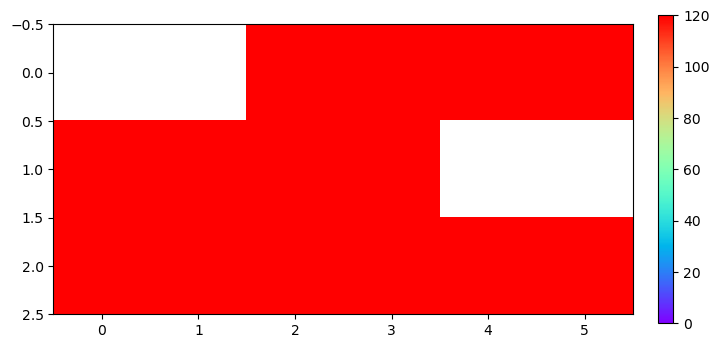

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/neon_mlbs2021_wgs84.tif, p5 0.0 , p95 290.01429443359376


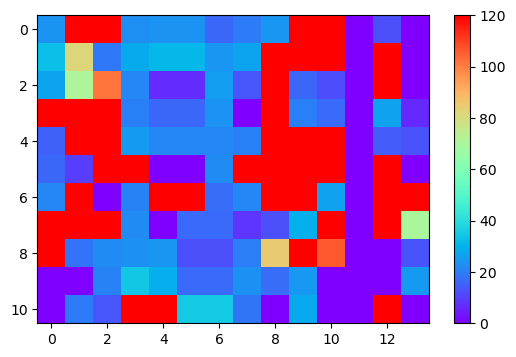

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/jpl_borneo_005_wgs84.tif, p5 0.0 , p95 149.84000549316403


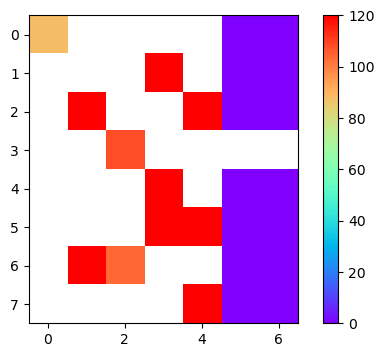

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2014_go1_wgs84.tif, p5 0.0 , p95 396.42849884033205


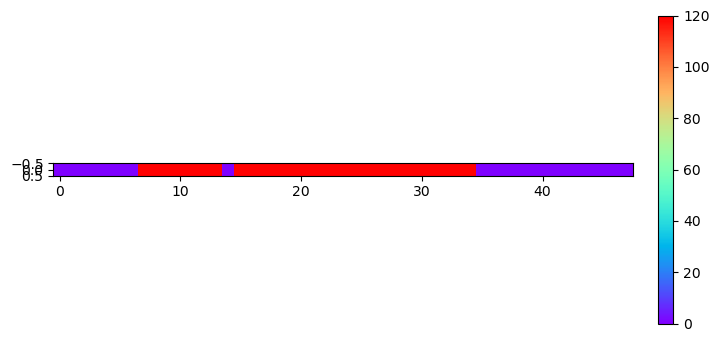

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/nsw_coffsharbour_wgs84.tif, p5 0.0 , p95 343.0276443481443


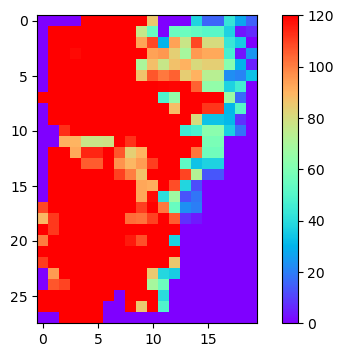

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/zofin_180416_wgs84.tif, p5 0.0 , p95 826.6217346191406


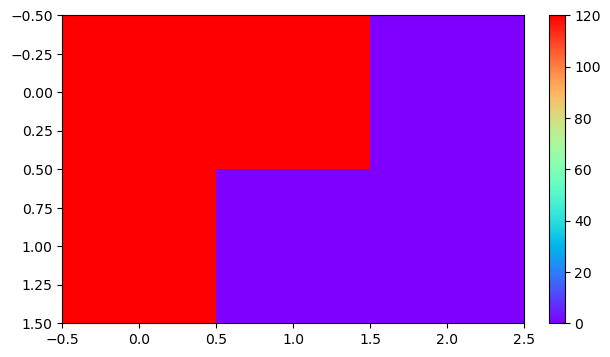

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2012_tap_wgs84.tif, p5 0.0 , p95 190.9074935913086


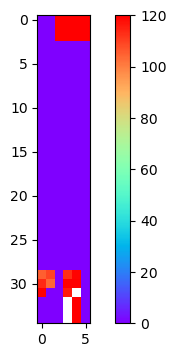

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/fitsum_southforksalmon_wgs84.tif, p5 0.0 , p95 1775.3299560546875


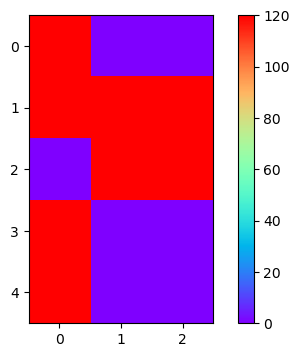

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/pref_fia_wgs84.tif, p5 0.0 , p95 1551.6800170898437


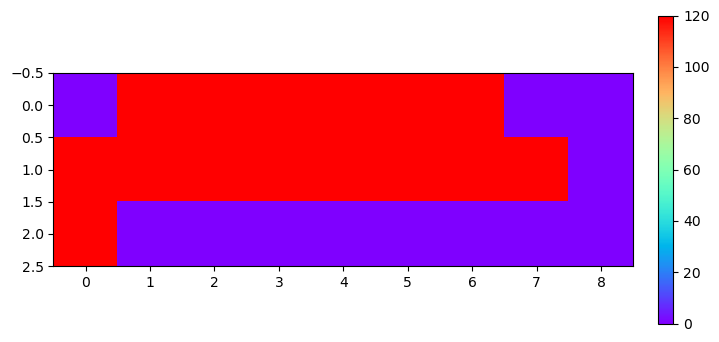

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_st1_wgs84.tif, p5 0.0 , p95 143.04750061035156


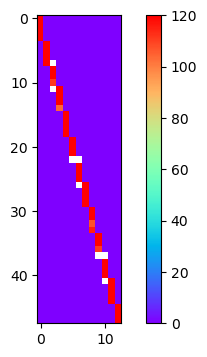

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/nsw_merimbula_wgs84.tif, p5 0.0 , p95 260.7014907836914


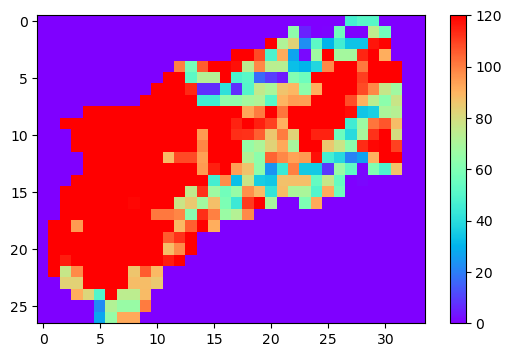

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/moscowmtn_2009_wgs84.tif, p5 0.0 , p95 1047.3400146484373


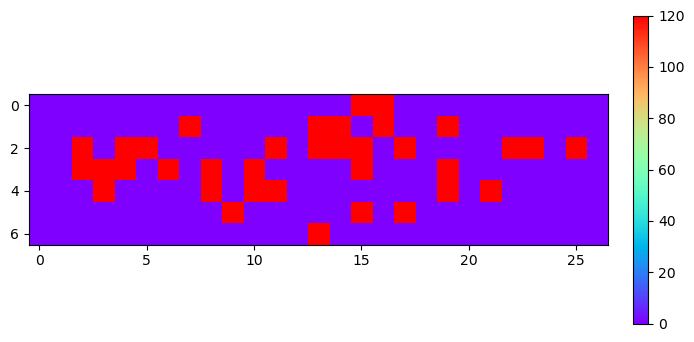

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/pref_pref_wgs84.tif, p5 0.0 , p95 1656.3815368652342


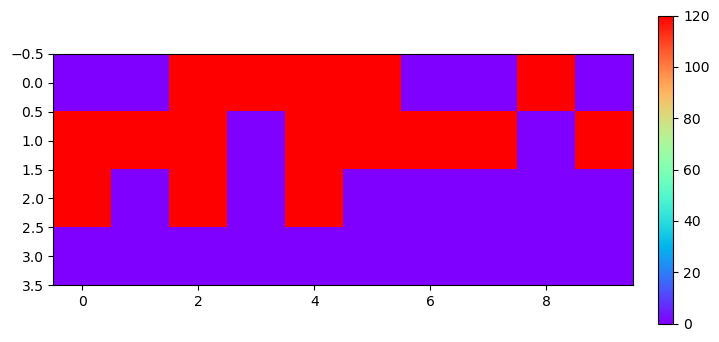

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2012_cau_wgs84.tif, p5 123.7599998474121 , p95 164.2185043334961


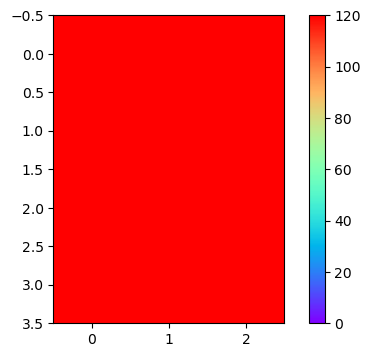

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_fst_wgs84.tif, p5 0.0 , p95 129.41599731445314


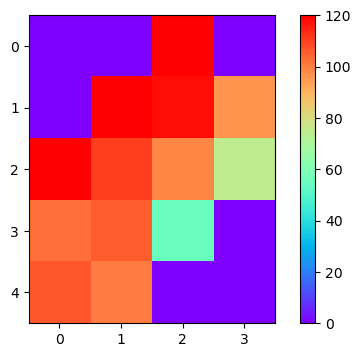

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/hill_peru_wgs84.tif, p5 0.0 , p95 264.58400421142574


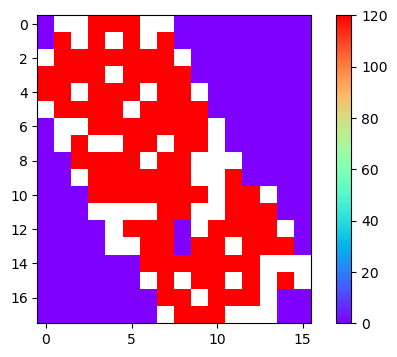

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/chave_nourages_wgs84.tif, p5 62.867498779296874 , p95 208.76800231933592


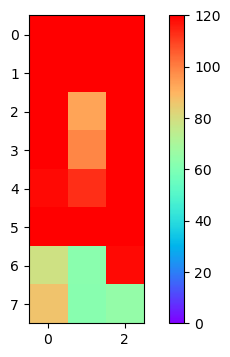

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/usda_or_wgs84.tif, p5 0.0 , p95 1675.5000427246093


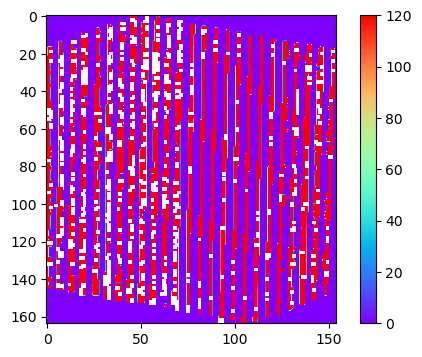

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_bon_wgs84.tif, p5 0.0 , p95 181.02999877929688


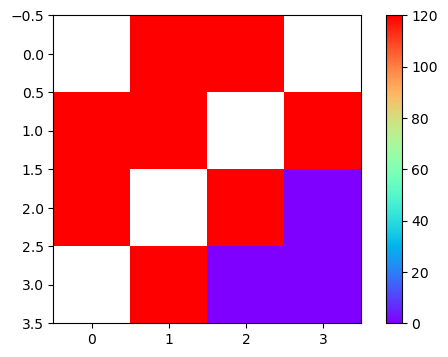

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2014_fnb_wgs84.tif, p5 0.0 , p95 365.98000183105466


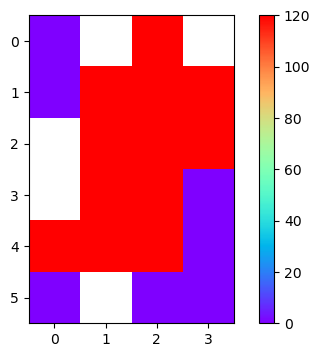

No data in this file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/cuilai_china_wgs84.tif
file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/nasa_ma_wgs84.tif, p5 0.0 , p95 344.1404891967773


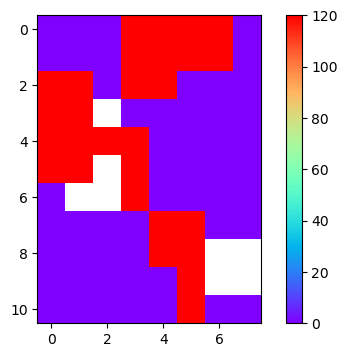

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/jpl_borneo_139_wgs84.tif, p5 0.0 , p95 508.99000549316395


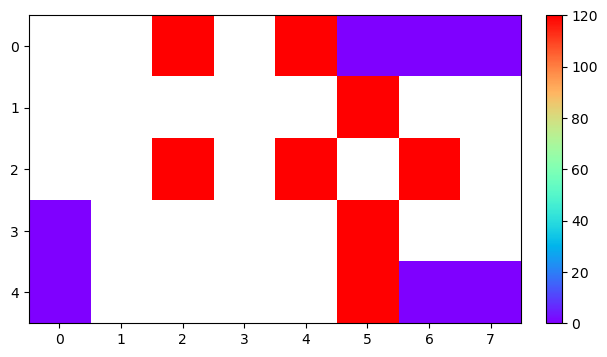

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/amani_wgs84.tif, p5 0.0 , p95 1025.423486328125


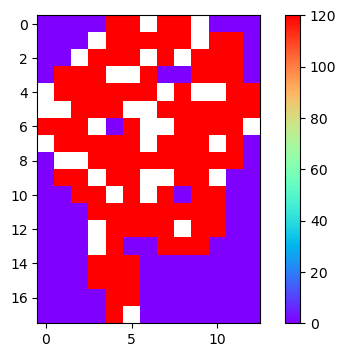

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/zofin_180607_wgs84.tif, p5 0.0 , p95 824.3822631835938


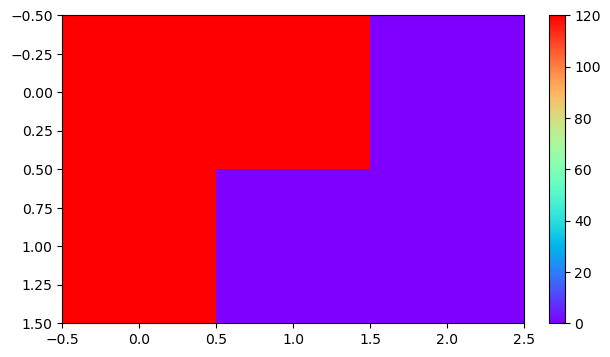

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_tal_wgs84.tif, p5 0.0 , p95 194.9130065917969


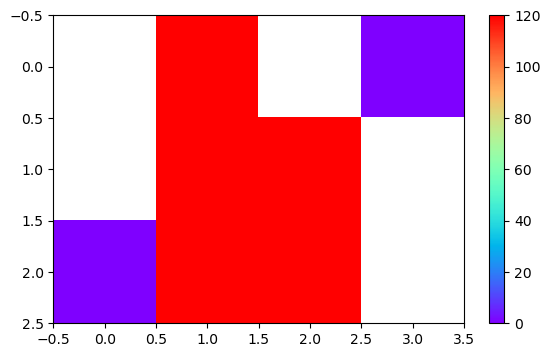

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/jpl_borneo_008_wgs84.tif, p5 0.0 , p95 757.4434753417969


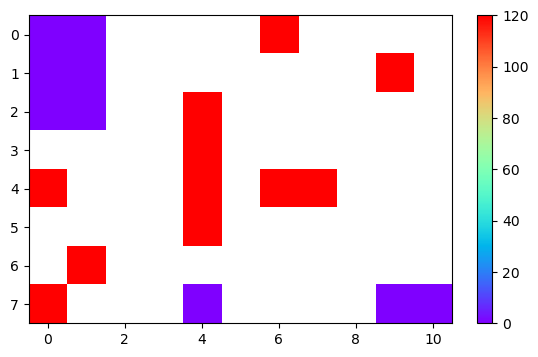

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_fn2_wgs84.tif, p5 0.0 , p95 315.80201110839846


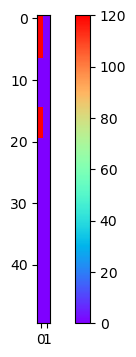

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2014_rib_wgs84.tif, p5 0.0 , p95 203.45899963378906


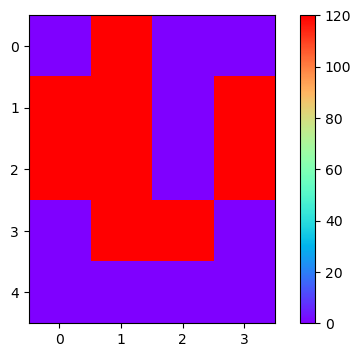

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2008_tap_wgs84.tif, p5 0.0 , p95 175.12999725341797


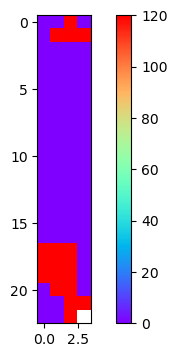

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/aso_sierra_nevada_wgs84.tif, p5 0.0 , p95 3394.7755249023435


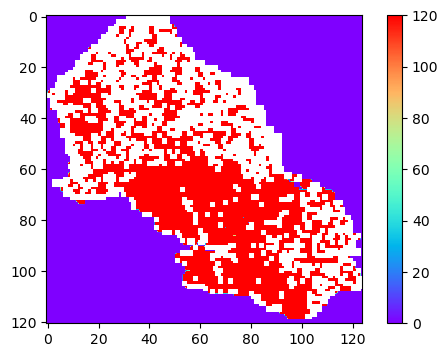

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_fn1_wgs84.tif, p5 0.0 , p95 324.7049865722656


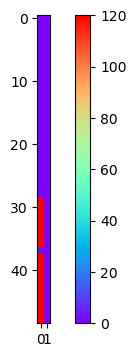

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_tap_wgs84.tif, p5 0.0 , p95 153.09649581909179


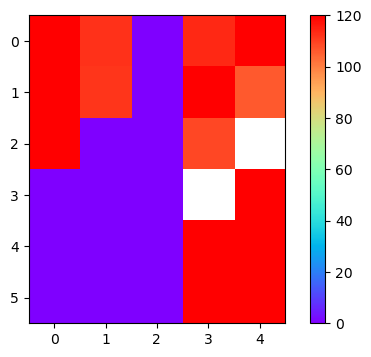

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_par_wgs84.tif, p5 0.0 , p95 192.4070037841797


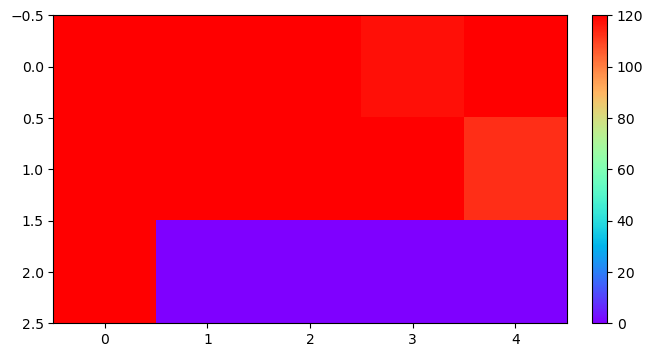

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2014_cau_wgs84.tif, p5 129.68799743652343 , p95 163.54349899291992


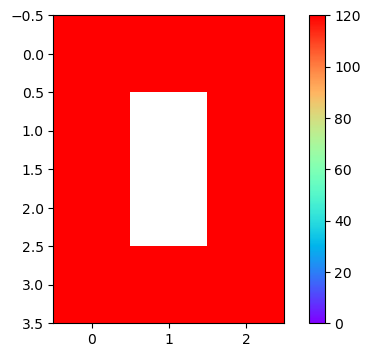

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2012_sdm_wgs84.tif, p5 0.0 , p95 1084.1800537109375


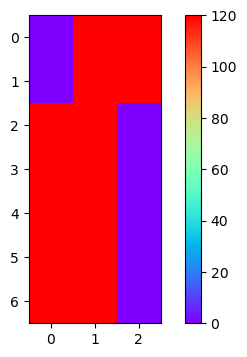

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/neon_teak2021_wgs84.tif, p5 0.0 , p95 276.0004882812498


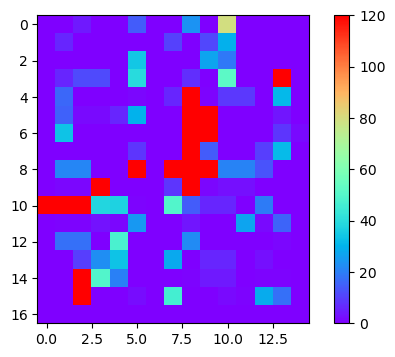

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/silvanet_valsain_wgs84.tif, p5 0.0 , p95 1730.8975219726562


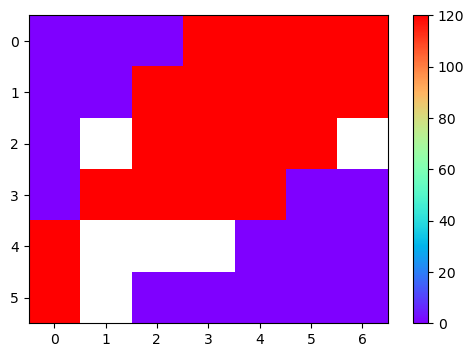

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/boschetti_idaho_clearcreek_wgs84.tif, p5 0.0 , p95 1692.589990234375


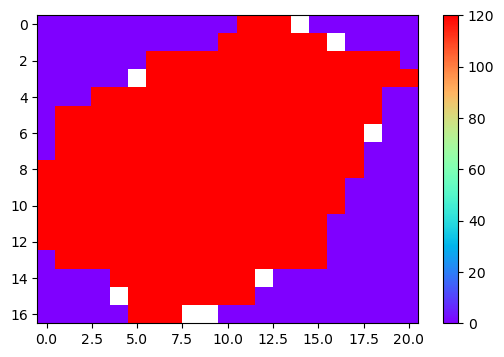

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2012_tan_wgs84.tif, p5 215.4620071411133 , p95 390.79500579833984


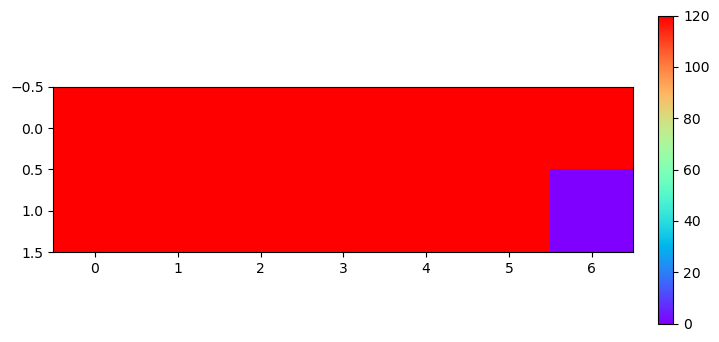

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2011_cot_wgs84.tif, p5 283.50850372314454 , p95 356.6735046386719


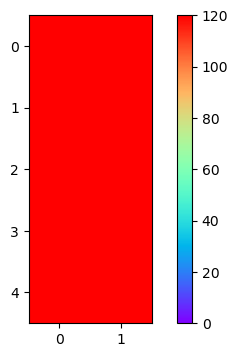

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/usda_panj_wgs84.tif, p5 0.0 , p95 154.68500137329102


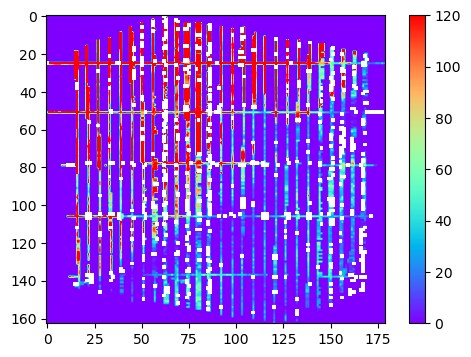

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/nasa_hubbard_wgs84.tif, p5 0.0 , p95 818.2145172119141


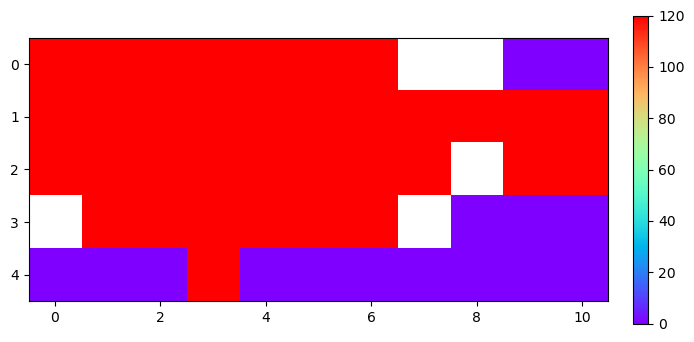

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/kljun_tharandt_wgs84.tif, p5 0.0 , p95 690.1799926757812


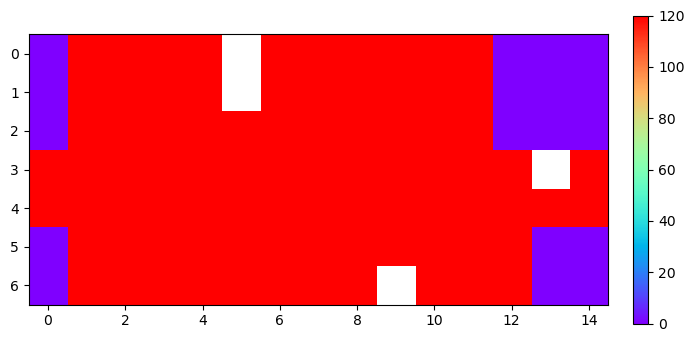

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/moscowmtn_2007_wgs84.tif, p5 0.0 , p95 779.9599792480466


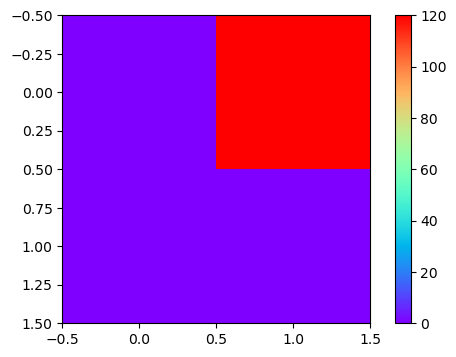

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/nasa_sierra_wgs84.tif, p5 0.0 , p95 2417.470007324219


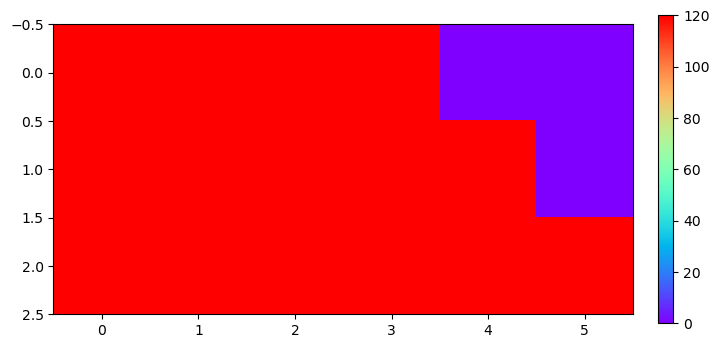

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/nsw_armidale_wgs84.tif, p5 0.0 , p95 1123.1085998535154


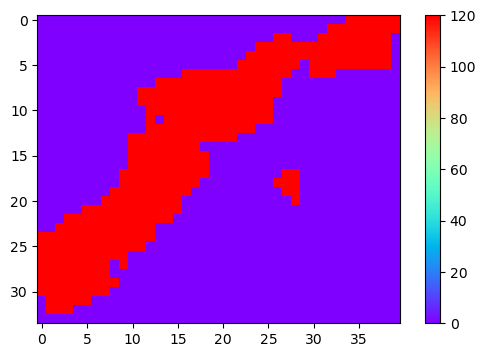

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/germany_coburn2_wgs84.tif, p5 0.0 , p95 761.5572662353516


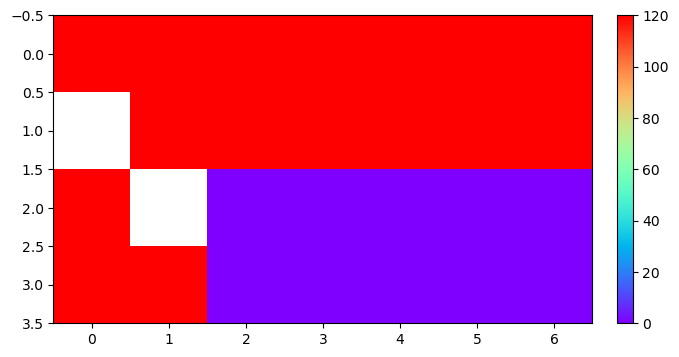

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/plumasnf_20180707_wgs84.tif, p5 0.0 , p95 1865.288012695312


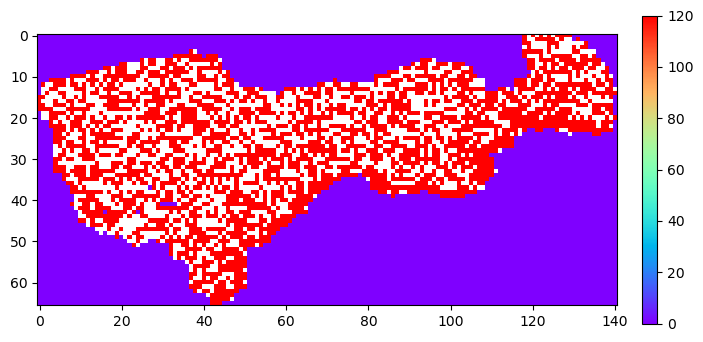

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/dcef_nfp_2011_wgs84.tif, p5 0.0 , p95 1164.6834655761718


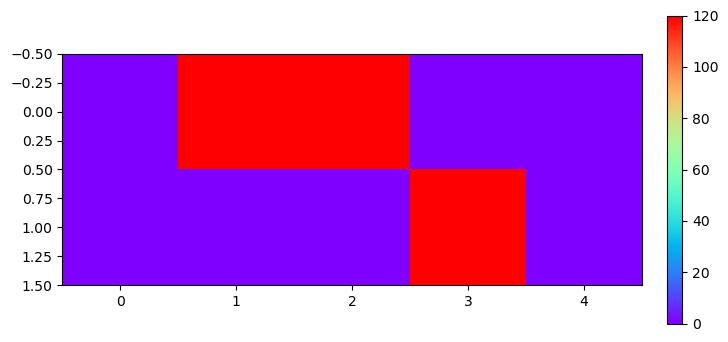

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_fna_wgs84.tif, p5 369.01200714111326 , p95 399.2889953613281


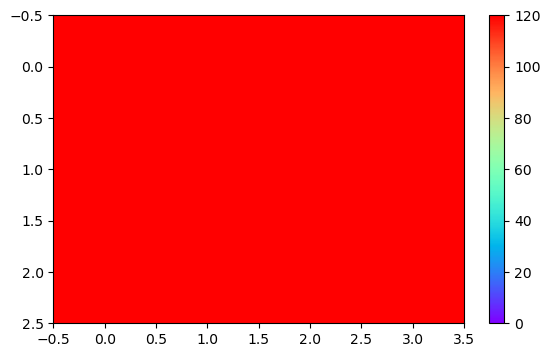

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/dcef_nfp_2009_wgs84.tif, p5 0.0 , p95 1078.4870178222657


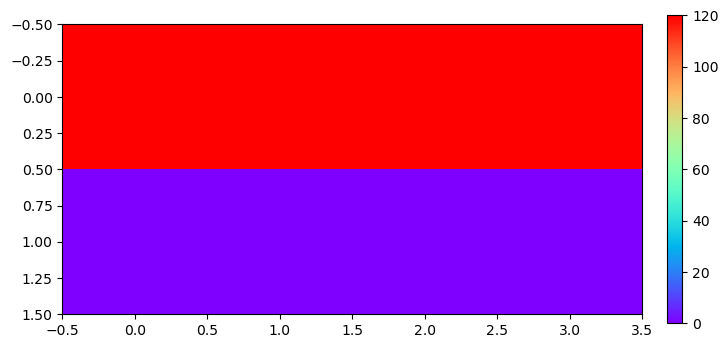

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/falkowski_damon_2007_wgs84.tif, p5 0.0 , p95 1559.3399658203125


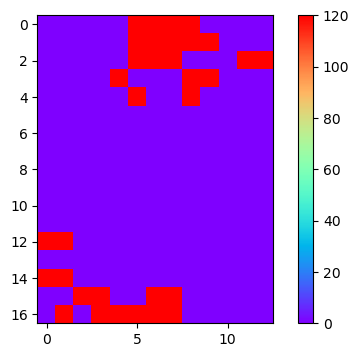

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2014_tan_wgs84.tif, p5 0.0 , p95 379.1935043334961


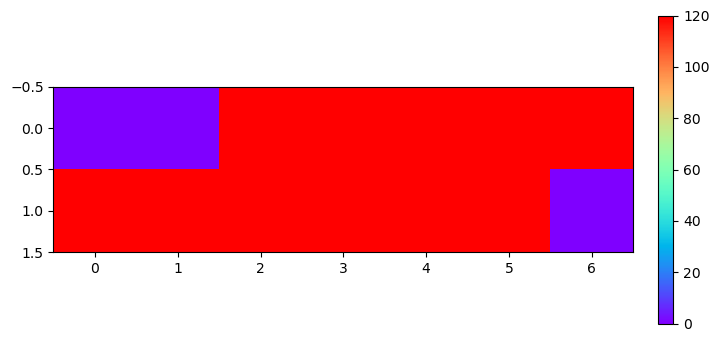

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2012_duc_wgs84.tif, p5 80.31999893188477 , p95 127.97999687194823


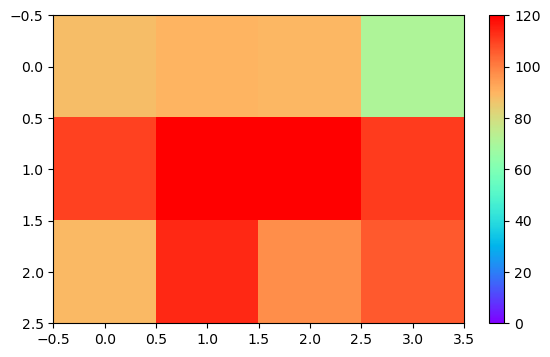

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/upperlolo_wgs84.tif, p5 0.0 , p95 1134.1320251464842


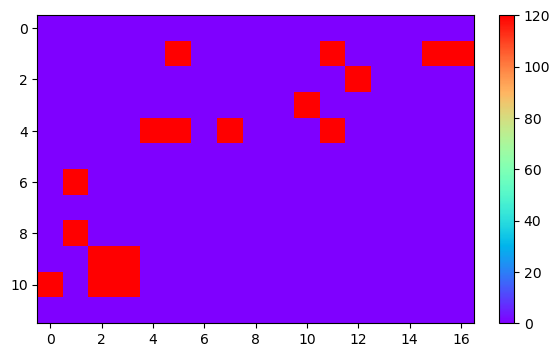

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/dcef_nfp_2010_wgs84.tif, p5 335.5799957275391 , p95 1156.6205139160156


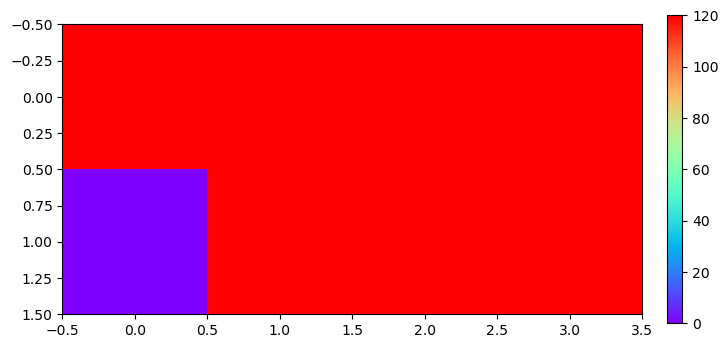

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/neon_soap2021_wgs84.tif, p5 0.0 , p95 356.510009765625


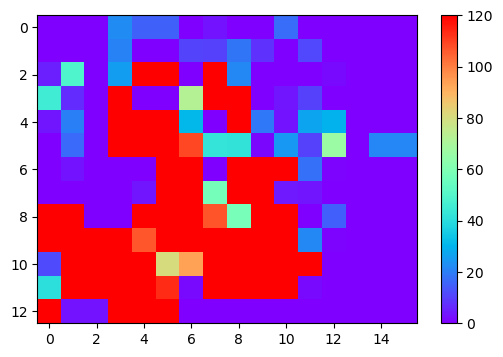

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/stjoe_wgs84.tif, p5 0.0 , p95 993.0233032226563


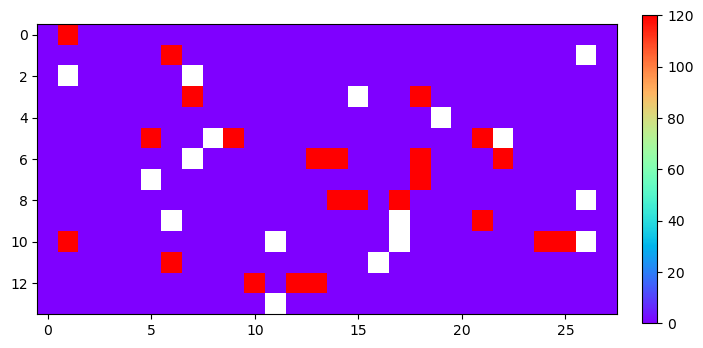

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/boyd_danum_wgs84.tif, p5 0.0 , p95 404.5179992675781


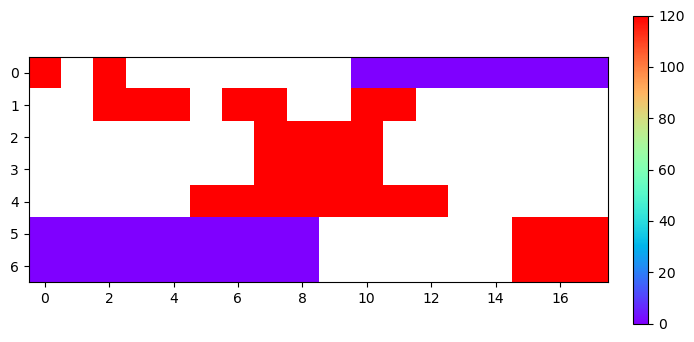

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/tanzania_wwf_germany_wgs84.tif, p5 0.0 , p95 582.5775054931639


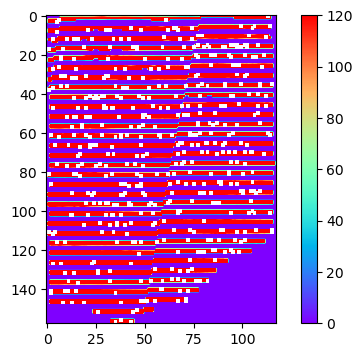

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/malaysia_davidcoomes_wgs84.tif, p5 0.0 , p95 404.5179992675781


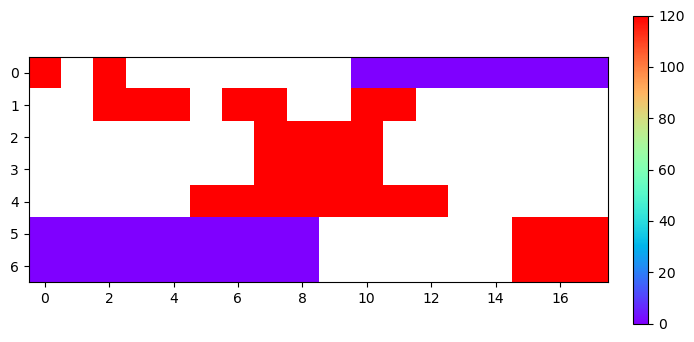

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/jpl_borneo_001_wgs84.tif, p5 0.0 , p95 185.08499908447266


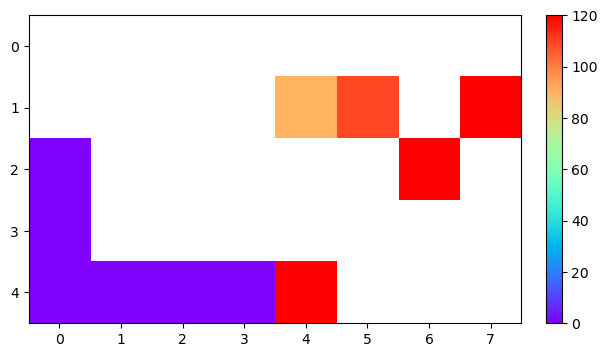

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2011_ant_wgs84.tif, p5 191.5665054321289 , p95 229.2860023498535


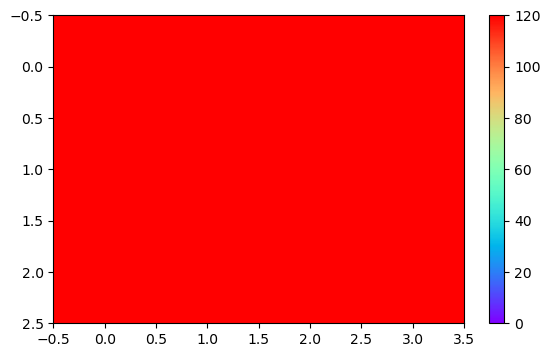

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2014_jam_wgs84.tif, p5 0.0 , p95 135.34849624633787


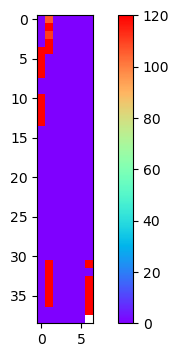

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/aso_sierra_nevada_snowoff_wgs84.tif, p5 0.0 , p95 3390.08603515625


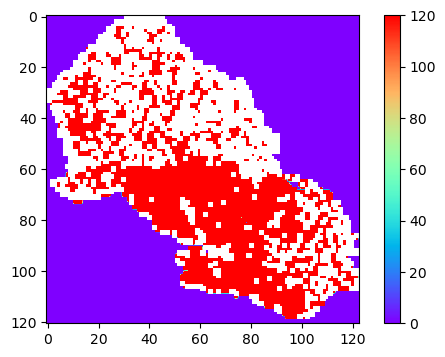

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_hum_wgs84.tif, p5 172.58700256347657 , p95 197.41950378417968


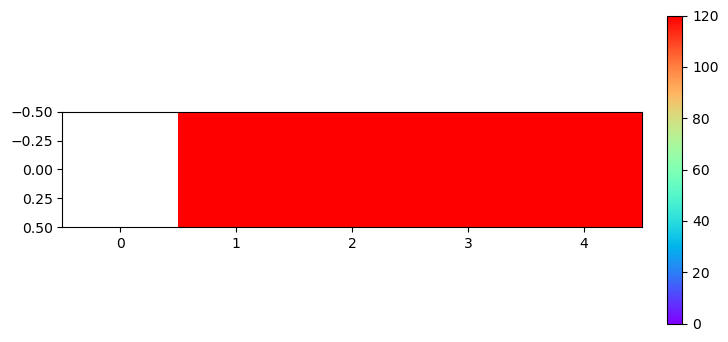

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/nsw_taree_wgs84.tif, p5 0.0 , p95 238.80980148315433


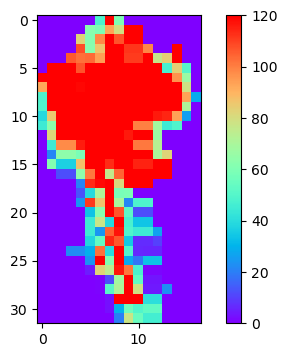

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/neon_unde2019_wgs84.tif, p5 0.0 , p95 353.847590637207


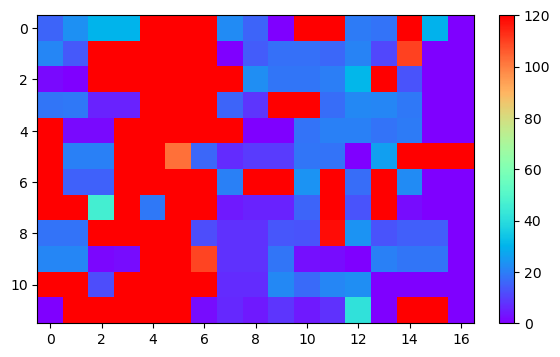

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/jpl_lope_wgs84.tif, p5 0.0 , p95 449.9590057373047


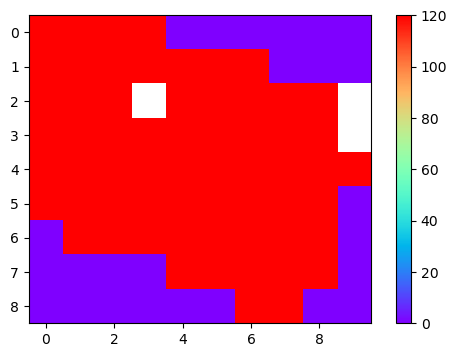

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/stanley_stanley_wgs84.tif, p5 0.0 , p95 2090.846081542969


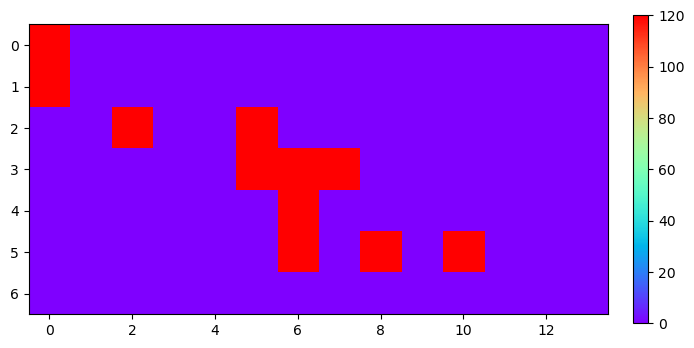

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/moscowmtn_2003_wgs84.tif, p5 0.0 , p95 888.0681549072267


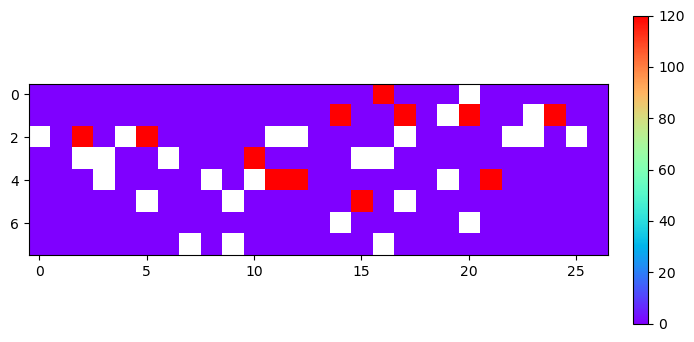

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_cag_wgs84.tif, p5 0.0 , p95 1018.9399841308593


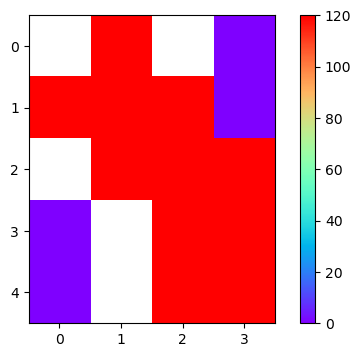

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2013_jam_wgs84.tif, p5 0.0 , p95 125.27400131225585


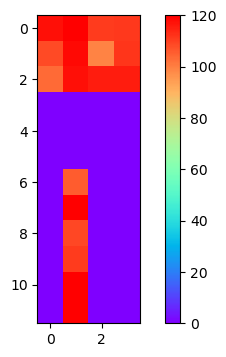

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/neon_clbj2022_wgs84.tif, p5 0.0 , p95 190.07475967407225


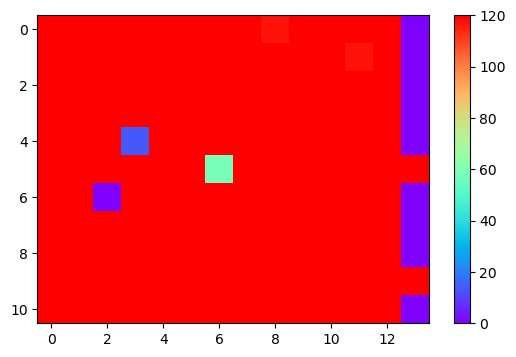

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/italy_sella_wgs84.tif, p5 1008.5160186767578 , p95 1306.9045104980469


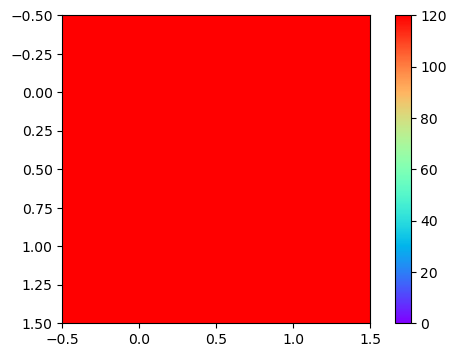

file /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/demiguel_soriai_wgs84.tif, p5 0.0 , p95 1153.06005859375


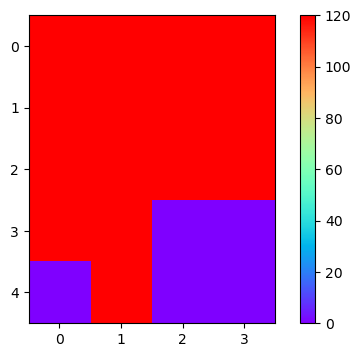

In [469]:

for c in chms:
    site = os.path.basename(c)[:-10]
    # if site in VALID_SITES:
    #         plot_tif(c)
    plot_tif(c)

In [479]:
# full list
res = []
for c in chms:
    dataset = rasterio.open(c)
    band1 = dataset.read(1)
    data = band1[~np.isnan(band1)]
    data = data[data != -999999]
    if len(data) < 1: 
        print('No data in this file', c)
        continue
    p5 = np.percentile(data, 5)
    p95 = np.percentile(data, 95)
    if p5 < -10 or p95 > 120:
        print(p5,p95, c)
        res.append(os.path.basename(c)[:-10])

0.0 1735.3009765624993 /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/slatecreek_2008_wgs84.tif
81.0159984588623 670.1830200195312 /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/jpl_borneo_138_wgs84.tif
0.0 925.9354949951172 /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2014_can_wgs84.tif
0.0 418.479000854492 /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/usda_mn_wgs84.tif
0.0 308.8245025634765 /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/neon_blan2022_wgs84.tif
688.0543579101562 847.2540283203125 /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/germany_coburn1_wgs84.tif
0.0 290.01429443359376 /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/neon_mlbs2021_wgs84.tif
0.0 149.84000549316403 /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/jpl_borneo_005_wgs84.tif
0.0 396.42849884033205 /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/chm/embrapa_brazil_keller_2014_go1_wgs84.tif
0.0 343.0276443481443 /gpfs/data1/vclgp/xiong

In [463]:
print(res)

['slatecreek_2008', 'jpl_borneo_138', 'embrapa_brazil_keller_2014_can', 'usda_mn', 'neon_blan2022', 'germany_coburn1', 'neon_mlbs2021', 'jpl_borneo_005', 'embrapa_brazil_keller_2014_go1', 'nsw_coffsharbour', 'zofin_180416', 'embrapa_brazil_keller_2012_tap', 'fitsum_southforksalmon', 'pref_fia', 'embrapa_brazil_keller_2013_st1', 'nsw_merimbula', 'moscowmtn_2009', 'pref_pref', 'embrapa_brazil_keller_2012_cau', 'embrapa_brazil_keller_2013_fst', 'hill_peru', 'chave_nourages', 'usda_or', 'embrapa_brazil_keller_2013_bon', 'embrapa_brazil_keller_2014_fnb', 'nasa_ma', 'jpl_borneo_139', 'amani', 'zofin_180607', 'embrapa_brazil_keller_2013_tal', 'jpl_borneo_008', 'embrapa_brazil_keller_2013_fn2', 'embrapa_brazil_keller_2014_rib', 'embrapa_brazil_keller_2008_tap', 'aso_sierra_nevada', 'embrapa_brazil_keller_2013_fn1', 'embrapa_brazil_keller_2013_tap', 'embrapa_brazil_keller_2013_par', 'embrapa_brazil_keller_2014_cau', 'embrapa_brazil_keller_2012_sdm', 'neon_teak2021', 'silvanet_valsain', 'boschet

In [446]:
import numpy as np
check_sites

[]

In [418]:
type(band1)

numpy.ndarray

In [387]:
# nsw_coffsharbour site
tifs = glob.glob('/gpfs/data1/vclgp/data/gedi/imported/australia/nsw_coffsharbour/chm/*.tif') 

file /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_coffsharbour/chm/512500_6669500_0000001_chm.tif, p5 96.25750160217285 , p95 151.24899291992188


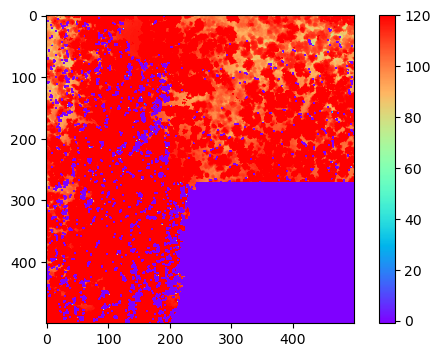

file /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_coffsharbour/chm/505000_6653500_0000000_chm.tif, p5 148.39999389648438 , p95 225.4875534057617


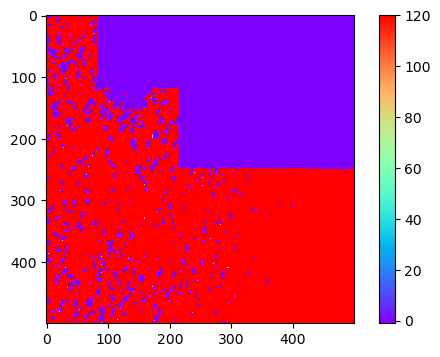

file /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_coffsharbour/chm/506500_6657000_0000002_chm.tif, p5 265.31500244140625 , p95 372.4162002563476


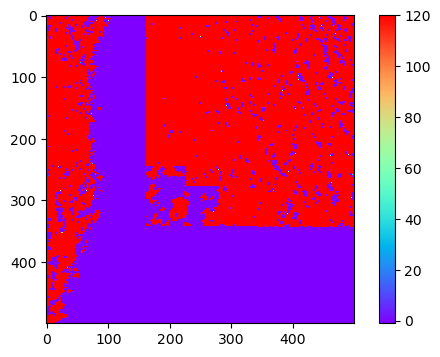

file /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_coffsharbour/chm/507000_6663500_0000002_chm.tif, p5 108.88500213623047 , p95 157.08560638427738


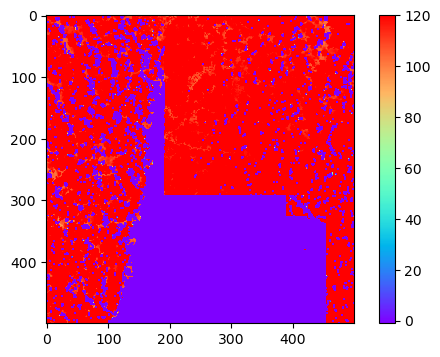

file /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_coffsharbour/chm/507500_6663500_0000002_chm.tif, p5 114.46224784851074 , p95 157.89300537109375


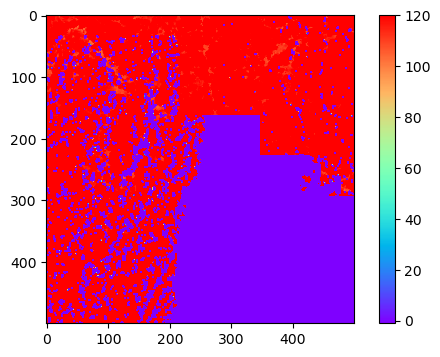

file /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_coffsharbour/chm/515500_6670500_0000000_chm.tif, p5 68.7760009765625 , p95 178.14700317382812


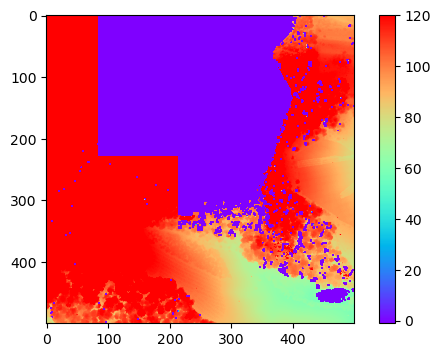

file /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_coffsharbour/chm/510000_6674000_0000001_chm.tif, p5 128.50165176391602 , p95 206.58535385131836


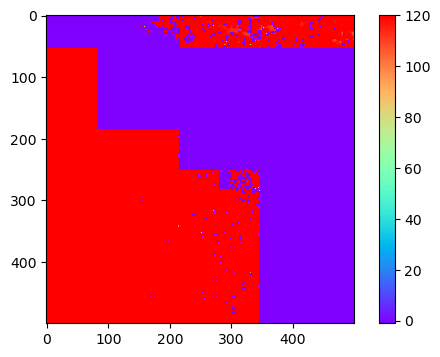

In [420]:
for c in tifs[100:110]:
    plot_tif(c)

In [433]:
dems  = glob.glob('/gpfs/data1/vclgp/data/gedi/imported/australia/nsw_coffsharbour/dem/*.tif') 


In [473]:
import glob
# Define the path
path = '/gpfs/data1/vclgp/data/gedi/imported/*/*/'
# Get folder names
folder_names = glob.glob(path)
print(len(folder_names))
# Filter out folders containing 'clipped'
folder_sites = [n for n in folder_names if 'clipped' not in n]
folder_sites = [n for n in folder_sites if '/lists/' not in n]
print("Total als site names:", len(folder_sites))
print("Example folder name:", folder_sites[1])

3650
Total als site names: 511
Example folder name: /gpfs/data1/vclgp/data/gedi/imported/asia/nagano_japan_full/


In [476]:
for f in folder_sites:
    if 'plumasnf' in f:
        print(f)

/gpfs/data1/vclgp/data/gedi/imported/usa/plumasnf_20180707/
/gpfs/data1/vclgp/data/gedi/imported/usa/plumasnf_20180717/


In [481]:
folder = '/gpfs/data1/vclgp/data/gedi/imported/usa/plumasnf_20180707/'
f'{folder}LAZ_ground/*.laz'

'/gpfs/data1/vclgp/data/gedi/imported/usa/plumasnf_20180707/LAZ_ground/*.laz'

In [484]:
folder_sites = [n for n in folder_sites if '/lists/' not in n]
# Write the list to the text file
with open('../data/als_sites_folder.txt', "w") as file:
    for item in folder_sites:
        file.write("%s\n" % item)

In [485]:
file_path = "../data/als_sites_folder.txt"
my_list = []
with open(file_path, "r") as file:
    my_list = file.readlines()
# Remove newline characters from the elements of the list
my_list = [item.strip() for item in my_list]
my_list

['/gpfs/data1/vclgp/data/gedi/imported/asia/zhangye_china/',
 '/gpfs/data1/vclgp/data/gedi/imported/asia/nagano_japan_full/',
 '/gpfs/data1/vclgp/data/gedi/imported/asia/nagano_japan/',
 '/gpfs/data1/vclgp/data/gedi/imported/asia/cuilai_china/',
 '/gpfs/data1/vclgp/data/gedi/imported/asia/khaoyai_thailand/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/spain_monfrague/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/spain_leon2/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/veg3D_laegeren/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/germany_coburn2/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/spain_extremadura/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/tellus_sw_uk/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/spain_exts4/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/kljun_tharandt/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/spain_exts1/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/kljun_loobos/',
 '/gpfs/data1/vclgp/data/gedi/imported/europe/sweden_skog2